# TensorFlow Graph and Sessions

TensorFlow uses a dataflow graph to represent your computation in terms of the dependencies between individual operations. This leads to a low-level programming model in which you first define the dataflow graph, then create a TensorFlow session to run parts of the graph across a set of local and remote devices.


# Tensors and place holder

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

tf.reset_default_graph() # reset the graph is useful during debugging
x = tf.placeholder(tf.float32, shape=(1, 4))
y_true = tf.constant([[0, -1, -2, -3]], dtype=tf.float32)

w = tf.Variable(tf.zeros([4,4]))
bias = tf.Variable(tf.zeros([4]))

# Build Computation Graph

In [73]:
# linear_model = tf.layers.Dense(units=1)
# y_pred = linear_model(x)

y_pred = tf.matmul(x, w) + bias
print(y_pred.shape)
loss = tf.losses.mean_squared_error(labels=y_true, predictions=y_pred)

optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)


(1, 4)


# Create Session

3.5
0.12055972
0.004152747
0.00014304556
4.9273676e-06
1.696832e-07
5.85894e-09
2.0372681e-10
6.664891e-12
1.9895197e-13
[[ 0.         -0.99999976 -1.9999995  -2.9999993 ]]


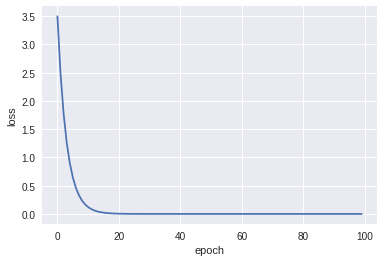

In [76]:
# Add an op to initialize the variables.
init = tf.global_variables_initializer()

# Add ops to save and restore all the variables.
saver = tf.train.Saver()


sess = tf.Session()
sess.run(init)
loss_ls = []
input_value = np.asarray([[1,2,3,4]], dtype=np.float32)
for i in range(100):
  _, loss_value = sess.run((train, loss),feed_dict={x: input_value})  # you can add more if want to output intermediate value for weight and bias, however the name should be different than variable name
  loss_ls.append(loss_value)
  if i%10 ==0:
    print(loss_value)
plt.plot(loss_ls)
plt.ylabel('loss')
plt.xlabel('epoch')
print(sess.run(y_pred,feed_dict={x: input_value}))
save_path = saver.save(sess, "/tmp/model_saved.ckpt")

# Store a Session

In [38]:
# get parameters stored in the session 
saver = tf.train.Saver()
with tf.Session() as sess:
  # Restore variables from disk.
  saver.restore(sess, "/tmp/model_saved.ckpt")
  print("Model restored.")
  print(sess.run(y_pred,feed_dict={x: input_value}))


INFO:tensorflow:Restoring parameters from /tmp/model_saved.ckpt
Model restored.
[[ 0.         -0.99999976 -1.9999995  -2.9999993 ]]


In [26]:
# get the name of node in the compatation graph
g = tf.get_default_graph()
# print(g.get_operations())
print([n.name for n in tf.get_default_graph().as_graph_def().node])


['Const', 'Const_1', 'dense/kernel/Initializer/random_uniform/shape', 'dense/kernel/Initializer/random_uniform/min', 'dense/kernel/Initializer/random_uniform/max', 'dense/kernel/Initializer/random_uniform/RandomUniform', 'dense/kernel/Initializer/random_uniform/sub', 'dense/kernel/Initializer/random_uniform/mul', 'dense/kernel/Initializer/random_uniform', 'dense/kernel', 'dense/kernel/Assign', 'dense/kernel/read', 'dense/bias/Initializer/zeros', 'dense/bias', 'dense/bias/Assign', 'dense/bias/read', 'dense/MatMul', 'dense/BiasAdd', 'mean_squared_error/SquaredDifference', 'mean_squared_error/assert_broadcastable/weights', 'mean_squared_error/assert_broadcastable/weights/shape', 'mean_squared_error/assert_broadcastable/weights/rank', 'mean_squared_error/assert_broadcastable/values/shape', 'mean_squared_error/assert_broadcastable/values/rank', 'mean_squared_error/assert_broadcastable/static_scalar_check_success', 'mean_squared_error/ToFloat/x', 'mean_squared_error/Mul', 'mean_squared_error